In [7]:
import matplotlib.pyplot as plt
from util import to_onehot, moving_average, Agent
import gym
from gym.envs.registration import register, spec

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
MY_ENV_NAME='FrozenLakeNonskid4x4-v4'

register(
    id=MY_ENV_NAME,
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4', 'is_slippery': False},
    timestep_limit=100,
    reward_threshold=0.78, # optimum = .8196
)
env = gym.make(MY_ENV_NAME)

[2017-10-01 19:50:20,462] Making new env: FrozenLakeNonskid4x4-v4


In [3]:
SAMPLE_BATCH_SIZE = 32
OBSERVATION_SPACE = env.observation_space.n
ACTION_SPACE = env.action_space.n  # 0 = left; 1 = down; 2 = right;  3 = up
agent = Agent(OBSERVATION_SPACE, ACTION_SPACE)

In [4]:
history = []
num_steps = []

for episode in range(3000):
    
    state = env.reset()  # state is a int number corresponding to the agent's position in a board
    done = False
    steps = 0
    
    while not done:
        
        # propose an action
        curr_state_encoded = to_onehot(OBSERVATION_SPACE, state).reshape(1,OBSERVATION_SPACE)
        action = agent.act(curr_state_encoded)
        
        # what are the consequences of taking that action?
        next_state, reward, done, transmit_prob = env.step(action)
        next_state_encoded = to_onehot(OBSERVATION_SPACE, next_state).reshape(1,OBSERVATION_SPACE)
        
        
        # store memories
        agent.remember(curr_state_encoded, action, reward, next_state_encoded, done)
        
        # move on to next state and continue
        state = next_state
        steps += 1
    agent.replay(SAMPLE_BATCH_SIZE)
    
    if episode % 500 == 0:
        print episode
        
    if state == 15:
        history.append(1)
    else:
        history.append(0)
    num_steps.append(steps)

0
500
1000
1500
2000
2500


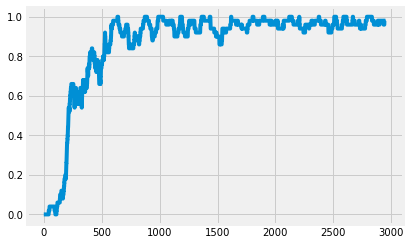

In [8]:
plt.plot(moving_average(history, 50))

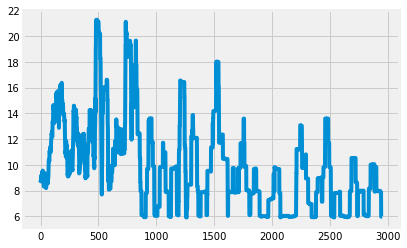

In [9]:
plt.plot(moving_average(num_steps, 50))